### 4) Visualization (S10, C1, C3)

#### 4.1) Functions for plot (S10)

**Define a function to store actual values dataframe with chosen values.**

In [1]:
def actual(model, year, country, operation):
    import pandas as pd
    import os
    
    #Assign production, consumption and import data folders to operations 
    ops = os.listdir("C:/Users/ismai/Desktop/electricity_forecast/electricity_data")
    
    #A for loop which executes same process below 
    df_o = []
    for op in ops: #I mean operation but it ruins my variable
        path = f"C:/Users/ismai/Desktop/electricity_forecast/electricity_data//{op}"
        excels = os.listdir(path)
        df = pd.read_excel(os.path.join(path,excels[0])) #Here I'm reading only the first argument because I have only one.
        df = df[['year_month', country]]
        df['Operation'] = f"{op}"
        df_o.append(df)
        
    if operation == 'consumption':
        df_o = df_o[0] #first list in list is consumption
    elif operation == 'import':
        df_o = df_o[1] #second list in list is import
    elif operation == 'production':
        df_o = df_o[2] #third list is list is production (alphabetical order)
           
    data = pd.DataFrame(df_o,columns=['year_month', country, 'Operation'])
    data = data[data['year_month'] < str(year+1)]
       
    return data

**Define a function to store prediction dataframe with chosen values.**

In [2]:
def prediction(model, year, country, operation):
    import pandas as pd
    import os
    
    path = f"C:/Users/ismai/Desktop/electricity_forecast/visualization_data"
    excels = os.listdir(path)
    u1 = pd.read_excel(os.path.join(path,excels[0]))
    u2 = pd.read_excel(os.path.join(path,excels[1]))
    u3 = pd.read_excel(os.path.join(path,excels[2]))
    u4 = pd.read_excel(os.path.join(path,excels[3]))
    df = pd.concat([u1, u2, u3, u4])
    
    # Create variable with TRUE if model is chosen model
    m = df['Model'] == model
    # Create variable with TRUE if year is chosen year
    y = (df['year_month'] >= str(year)) & (df['year_month'] < str(year+1)) 
    # Create variable with TRUE if Country is chosen country
    c = df['Country'] == country 
    # Create variable with TRUE if Operation is chosen operation
    o = df['Operation'] == operation 

    # Select all cases and store it as pred_tes
    df = df[m & y & c & o]
   
    return df

**Define plot funtion**

In [5]:
def plot_all(model, year, country, operation):
    #Import libraries
    import pandas as pd
    import os
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [15,10]
    sns.set_style('darkgrid') # To have a background of grids in the plots
    
    #Get actual data and store it as act
    act = actual(model, year, country, operation)
    
    #Get prediction data and store it as pred
    pred = prediction(model, year, country, operation)
    
    #Plotting arguments
    x_actual = act.iloc[:,0] #year_month column
    y_actual = act.iloc[:,1] #country (actual values) column
    x_pred = pred.iloc[:,0] #year_month column
    y_pred = pred.iloc[:,5] #Forecast column
    
    plt.plot(x_actual, y_actual)
    plt.plot(x_pred, y_pred)
    plt.xlabel("Years")
    plt.ylabel("GWh - Gigawatt Hours")
    plt.title(str(country) + " - " + str(operation) + " of Electricity. Average SMAPE: " \
              + str(round(pred['smape'].mean(),1)) + "%.")
    plt.legend(['Actual Values', str(model) + " Forecast in " + str(year)], loc=0)
    plt.savefig('C:/Users/ismai/Desktop/electricity_forecast/figures/' + str(year) + '_' +\
                str(model) + '_' + str(country) + '_' + str(operation) + '.png')
    plt.show()

#### 4.2) Plotting Forecasts (C1, C3)

I will plot Denmark 2019 import, Greece 2020 production and Sweden 2019 consumption as examples and analyze them in conclusion. If you'd like to see all plots, please see the figures folder.

##### DENMARK

TES 2019 forecast for import of electricity in Denmark

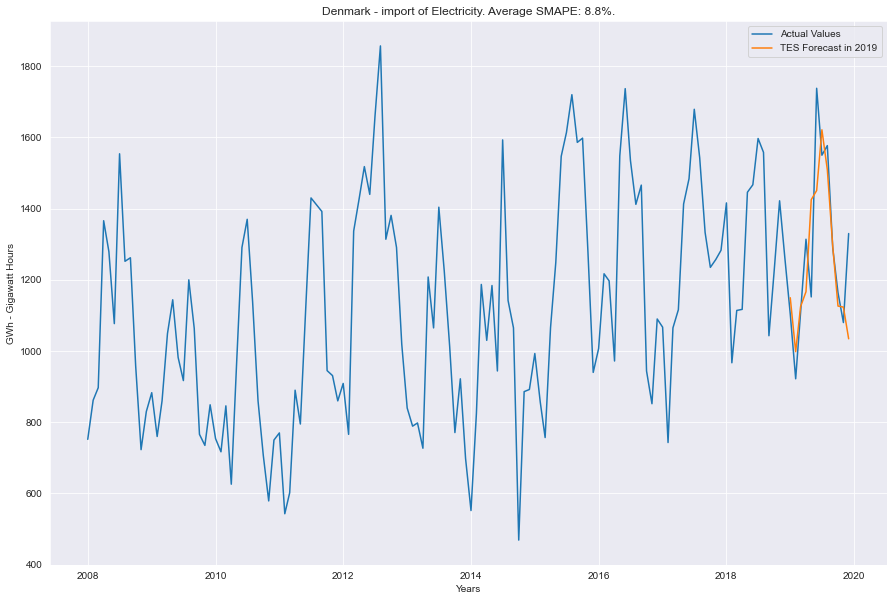

In [11]:
plot_all('TES', 2019, 'Denmark', 'import')

SARIMA 2019 forecast for import of electricity in Denmark

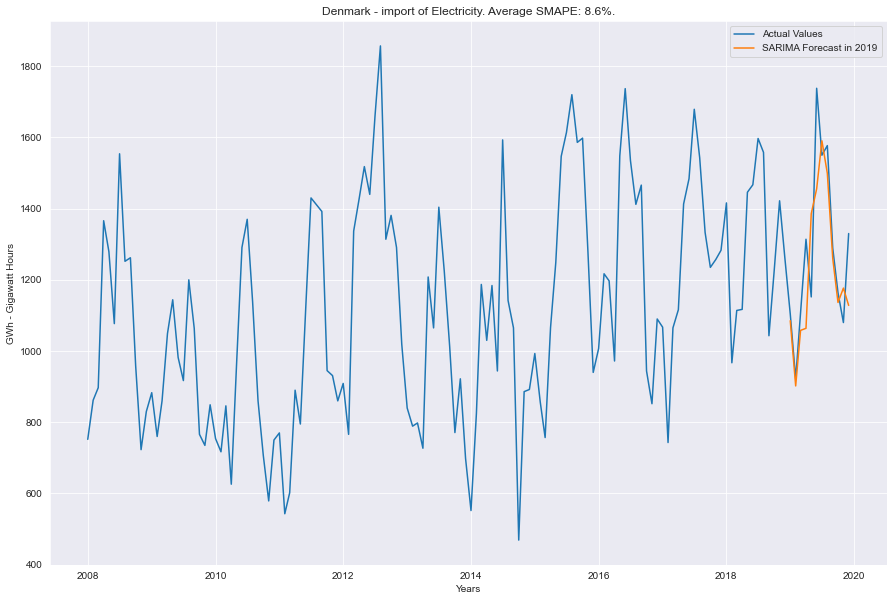

In [12]:
plot_all('SARIMA', 2019, 'Denmark', 'import')

##### GREECE 

TES 2020 forecast for production of electricity in Greece

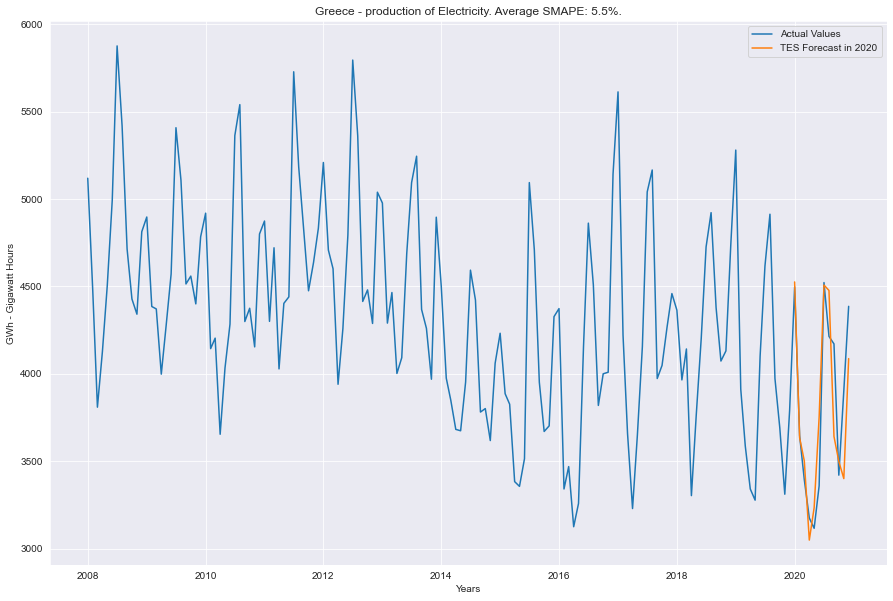

In [25]:
plot_all('TES', 2020, 'Greece', 'production')

SARIMA 2020 forecast for production of electricity in Greece

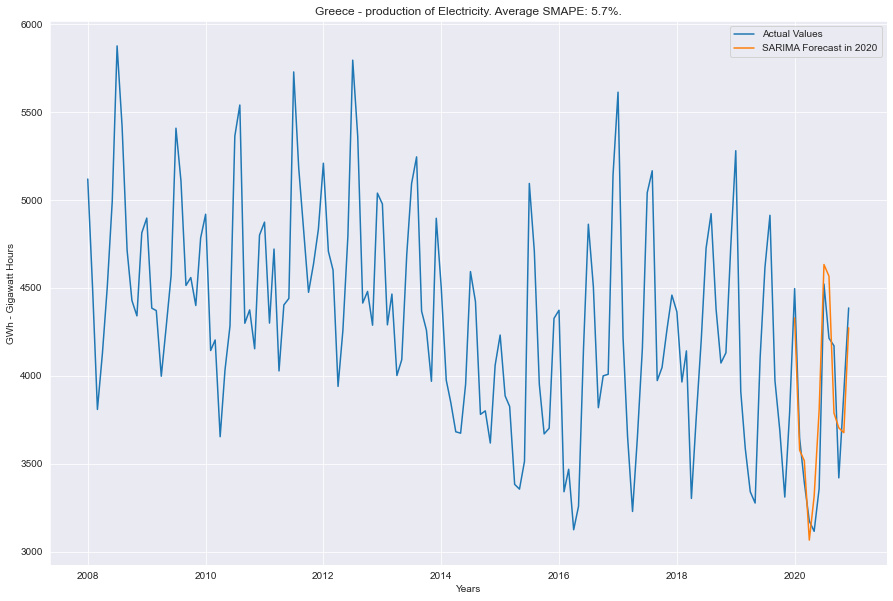

In [26]:
plot_all('SARIMA', 2020, 'Greece', 'production')

##### SWEDEN 

TES 2019 forecast for consumption of electricity in Sweden

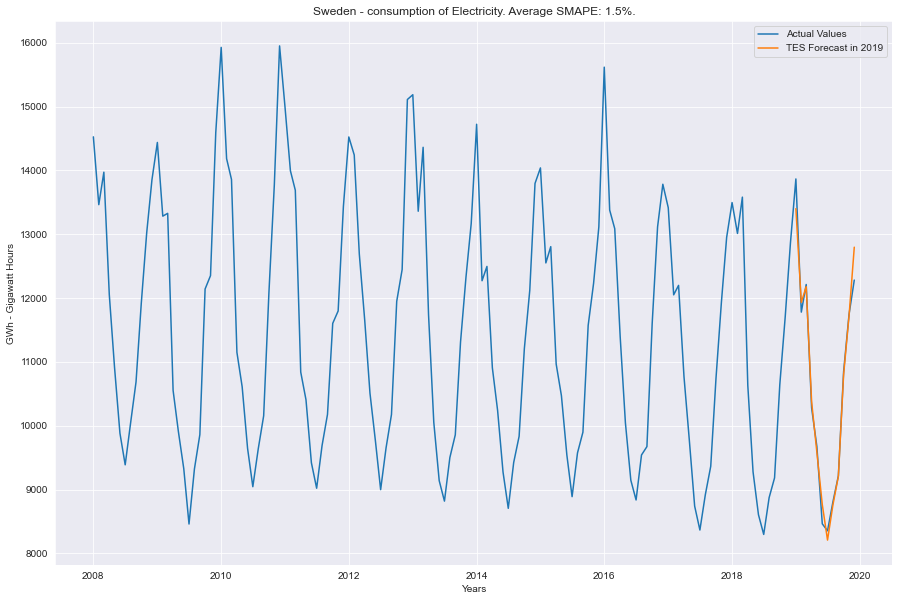

In [57]:
plot_all('TES', 2019, 'Sweden', 'consumption')

SARIMA 2019 forecast for consumption of electricity in Sweden

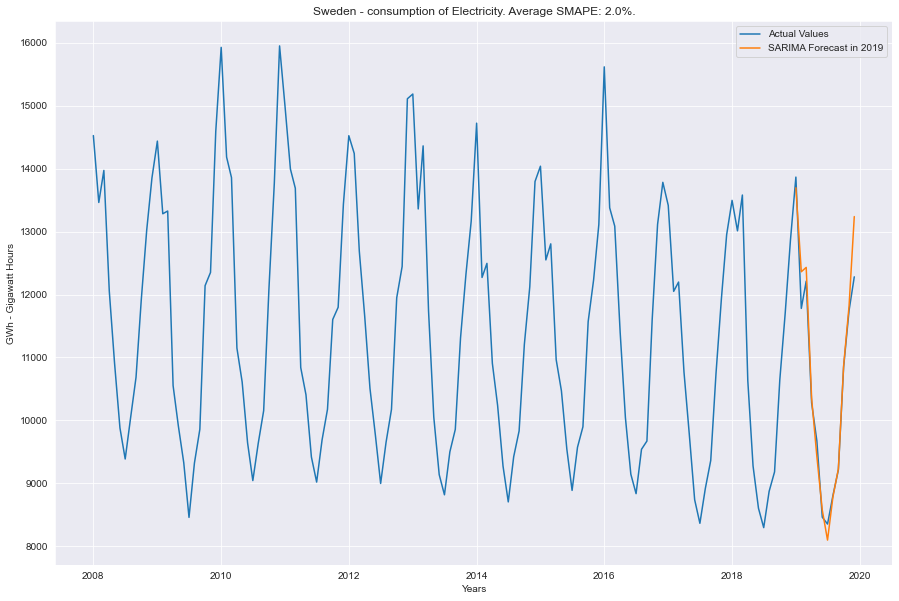

In [58]:
plot_all('SARIMA', 2019, 'Sweden', 'consumption')

## CONCLUSION (S7, S10) 

**SMAPE comparison between methods and years**

SMAPE of TES in 2019 is 7.9% when SMAPE of SARIMA in 2019 is 8.3%

SMAPE of TES in 2020 is 8.7% when SMAPE of SARIMA in 2020 is 10.0%

If we are going to choose only one method to be used for all production, consumption and import forecast this should be Triple Exponential Smoothing method since it's margin of error is less than Seasonal Autoregressive Integrated Moving Average.

On the other hand, we can clearly see that margin of error increased in 2020 than 2019 for both 2 methods; one possible reason might be the unpredictable cycle effects of Covid-19 on production, consumption and import in 2020.

**Digging deeper: Comparison of methods between years, operation and countries**

I created 60 plots and SMAPE results in the 5th chapter of Analysis part; yet I will choose 3 forecasts as examples and compare them in different methods. 

Sweden 2019 consumption forecast with TES      : SMAPE = 1.5%

Sweden 2019 consumption forecast with SARIMA   : SMAPE = 2.0%

Greece 2020 production forecast with TES       : SMAPE = 5.5%

Greece 2020 production forecast with SARIMA    : SMAPE = 5.7%

Denmark 2019 import forecast with TES          : SMAPE = 8.8%

Denmark 2019 import forecast with SARIMA       : SMAPE = 8.6%

If I would like to forecast consumption of electricity in Sweden, it's better to use TES.

If I would like to forecast production of electricity in Greece, it's better to use TES.

If I would like to forecast import of electricity in Denmark, it's better to use SARIMA.

**Reflection**

I had some Python and statistical implementation experience before; I spent most of my time learning different forecast models with time series, trying to build necessary functions, detecting bugs and debugging. And moreover, since my intention was to create a forecast model for electricity operations; after a long search I could finally find a usable (monthly based) dataset only in Eurostat.    

**Hindsight - What would I have done differently?**

The dataset is continuously being updated. I could create models that include current year once its data is completed. Then it would be automated. For sure, it'd take more time.

There are not only classical and econometric approaches. I could have also defined a Machine Learning approach and compare those 3 in between. In this project, I wanted to stick with statistical approaches.